# __Predicting the Survival of Titanic Passengers__

## __Will you meet the same fate as Leo, lets find that out, shall we 😆__?


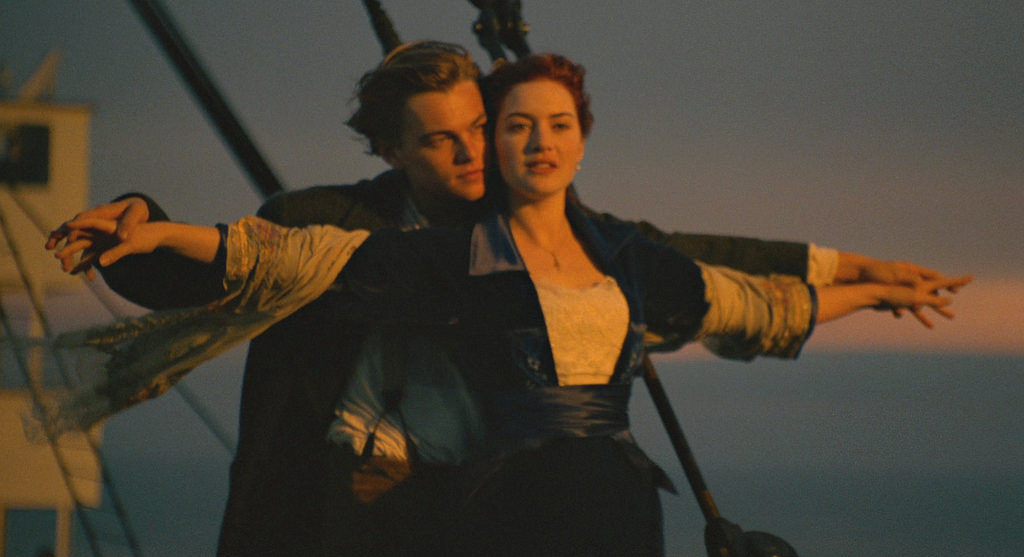

## __Royal Mail Ship Titanic...__

> _The RMS Titanic, a British passenger liner, sank on April 15, 1912, after hitting an iceberg during its maiden voyage from Southampton to New York City. Over 1,500 of the approximately 2,224 passengers and crew perished, making it a significant maritime disaster. Today, utilizing the Titanic Dataset, we aim to predict the survival outcomes of its passengers_

### __Data Description__

---

##### __Data Dictionary__
| Variable |	Definition	                               | Key                       |
|----------|:----------------------------------------------|:--------------------------|
|survival  |	Survival                                   |	0 = No, 1 = Yes        |
|pclass    |	Ticket class                               |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex       |	Sex                                        |	                       |
|Age       |	Age in years                               |	                       |
|sibsp     |	# of siblings / spouses aboard the Titanic |	|
|parch     |	# of parents / children aboard the Titanic |	|
|ticket    |	Ticket number                              |	                       |
|fare      |	Passenger fare                             |	                       |
|cabin     |	Cabin number                               |	                       |
|embarked  |	Port of Embarkation                        |	C = Cherbourg, Q = Queenstown, S = Southampton|

##### __Variable Notes__

__pclass__: A proxy for socio-economic status where
1 = Upper class deck,
2 = Middle class deck,
3 = Lower class deck


__age__ : Self explanatory, Age can fractional if less than 1 indicating infants


__sibsp__ : The dataset defines family relations in this way

Sibling (sib) = brother, sister, stepbrother, stepsister

Spouse (sp) = husband, wife (mistresses and fiancés are ignored in our thesis)


__parch__ : The dataset defines family relations in this way

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children also travelled only with their nanny, therefore parch=0 for those cases

### __Notebok Catalogue__

---

* __Part 1 - Data Preprocessing__
    1. Importing Libraries
    2. Importing Datasets
    3. Exploration Data Analysis (EDA)
        * Dataset Information
        * Data Preprocessing
            * Missing data
            * Converting Features
        * Creating Categories
        ---
        
* __Part 2 - Building and Training the Classification model__

    1. Random Forest
    2. Logestic Regresion
    3. K Nearest Neighbor
     ---
      
* __Part 3 - Choosing the best model, and testing it__

---

# __Part 1 - Data Preprocessing__

## __1. Importing Libraries__

In [46]:
# Linear Algebra
import numpy as np 
import pandas as pd

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Data Preprocessing 
from sklearn.model_selection import train_test_split
import re

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#hyper parameter tuning
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## __2. Import Datasets__

In [47]:
train_df = pd.read_csv('train_titanic.csv')
test_df = pd.read_csv('test_titanic.csv')

In [48]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.000,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.050,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.000,C126,S


## **3. Exploration Data Analysis**

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  670 non-null    int64  
 1   Survived     670 non-null    int64  
 2   Pclass       670 non-null    int64  
 3   Name         670 non-null    object 
 4   Sex          670 non-null    object 
 5   Age          529 non-null    float64
 6   SibSp        670 non-null    int64  
 7   Parch        670 non-null    int64  
 8   Ticket       670 non-null    object 
 9   Fare         670 non-null    float64
 10  Cabin        150 non-null    object 
 11  Embarked     669 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 62.9+ KB


__We've got 670 observations and 11 features in the train DataFrame, plus the target variable (survived).__

In [50]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,670.000000,670.000000,670.000000,529.000000,670.000000,670.000000,670.000000
mean,335.500000,0.389552,2.310448,29.948488,0.532836,0.377612,31.426610
std,193.556624,0.488013,0.835880,14.584687,1.067790,0.797478,44.873681
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,168.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,335.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.750000
75%,502.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.646850
max,670.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


Looking at the mean value under rhe Survived column We can say that approx __39% out of the training-set servived the titanic.__
We can also see that the passenger ages range from __0.75( infant) to 80__.

__Let’s take a detailed look at what train data is missing:__

In [51]:
# Count total missing values
total_missing = train_df.isnull().sum().sort_values(ascending=False)

# Calculate percentage of missing values
percent_missing = round(train_df.isnull().sum() / len(train_df) * 100, 1).sort_values(ascending=False)

# Create a DataFrame to display missing data statistics
missing_data = pd.concat([total_missing,percent_missing], axis=1, keys=['Total', '%'])
missing_data.head()


,Total,%
Cabin,520,77.6
Age,141,21.0
Embarked,1,0.1
PassengerId,0,0.0
Survived,0,0.0


According to the above table of __"Missing Values"__ , the __Embarked__ feature has only __1 missing values__, which can easily be filled. lets see how To deal with the __‘Age’__ feature (later), which has __141 missing values__. The __‘Cabin’__ feature needs further investigation, but it looks like most probably I  will drop it from the dataset, since almost __77 % of it is missing__.
It can be said with certainity that __‘PassengerId’__, __‘Ticket’__ and __‘Name’__ would not be correlated with a high survival rate.

#### Lets find more information about dataset features

#### __1. Age & Sex vs Survival__

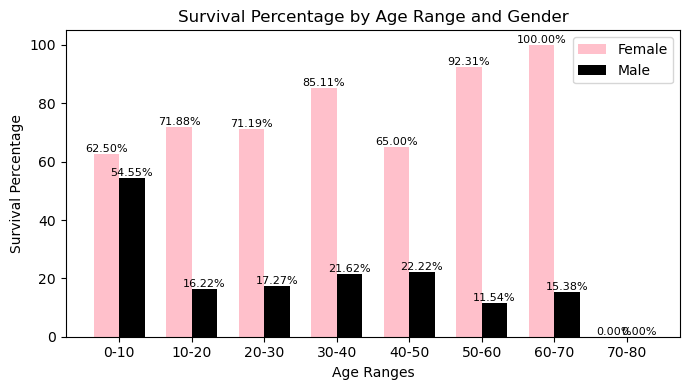

In [52]:
def plot_survival_percentage(data):
    # Define age ranges
    age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80)]

    # Function to calculate survival percentage for each age group for males and females
    def calculate_survival_percentage_by_age(data, gender):
        survival_percentages = []
        gender_data = data[data['Sex'] == gender]
        
        for age_range in age_ranges:
            lower, upper = age_range
            total_count = len(gender_data[(gender_data['Age'] >= lower) & (gender_data['Age'] < upper)])
            if total_count != 0:
                survived_count = len(gender_data[(gender_data['Age'] >= lower) & (gender_data['Age'] < upper) & (gender_data['Survived'] == 1)])
                survival_percentage = (survived_count / total_count) * 100
            else:
                survival_percentage = 0
            survival_percentages.append(survival_percentage)
            
        return survival_percentages

    # Calculate survival percentages for males and females
    survival_percentages_female = calculate_survival_percentage_by_age(data, 'female')
    survival_percentages_male = calculate_survival_percentage_by_age(data, 'male')

    # Create age range labels
    age_range_labels = [f'{lower}-{upper}' for lower, upper in age_ranges]

    # Plotting the histogram
    plt.figure(figsize=(7, 4))
    bar_width = 0.35
    index = range(len(age_range_labels))

    bars1 = plt.bar(index, survival_percentages_female, bar_width, label='Female', color='pink')
    bars2 = plt.bar([i + bar_width for i in index], survival_percentages_male, bar_width, label='Male', color='black')

    plt.xlabel('Age Ranges')
    plt.ylabel('Survival Percentage')
    plt.title('Survival Percentage by Age Range and Gender')
    plt.xticks([i + bar_width / 2 for i in index], age_range_labels)
    plt.legend()

    # Annotating the bars with exact percentages
    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()


# Example usage:
plot_survival_percentage(train_df)


You can see that women have a high probability of survival at any age group,For women the survival chances are highest between age 60-70 (100%) and during infancy (62.5%)

For men the probability of survival is very lowsst between the age of 10 and 20, but that isn’t true for women. 

__Another thing to note is that infants have a little bit higher probability of survival.__


#### __2. Pclass vs Survival__ 

<Axes: xlabel='Pclass', ylabel='Survived'>

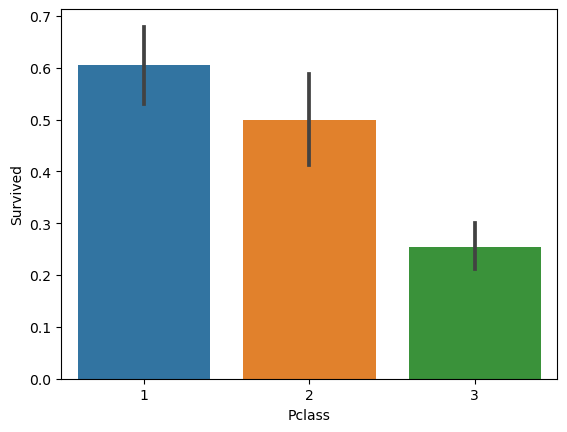

In [53]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

__Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below__

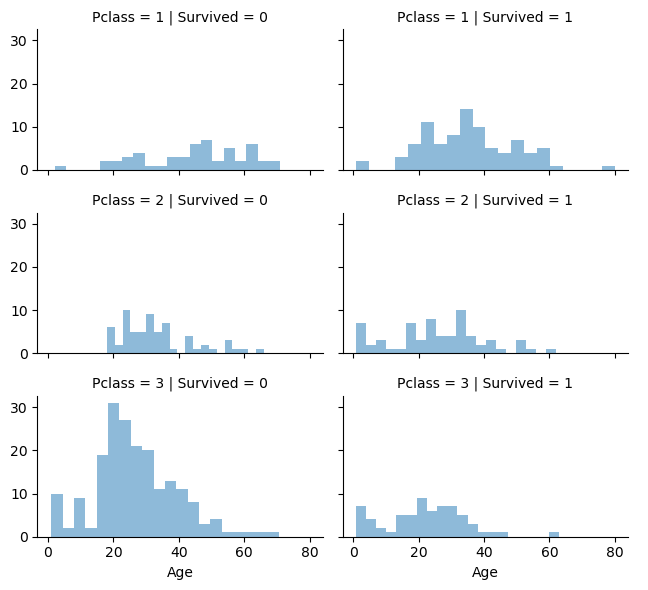

In [54]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

__The plot above confirms my assumption about pclass 1, class 1 travellers survival probability is way higher than class 3 travellers__

#### __4. SibSp and Parch__

SibSp and Parch would make __more sense as a combined feature__, that shows the __total number of relatives, a person has on the Titanic__. I will create it below and also a feature that shows if someone is not alone.

In [55]:
data = [train_df, test_df]  # apply transformation for both train and test dataframe
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)  # dropping the original columns


In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


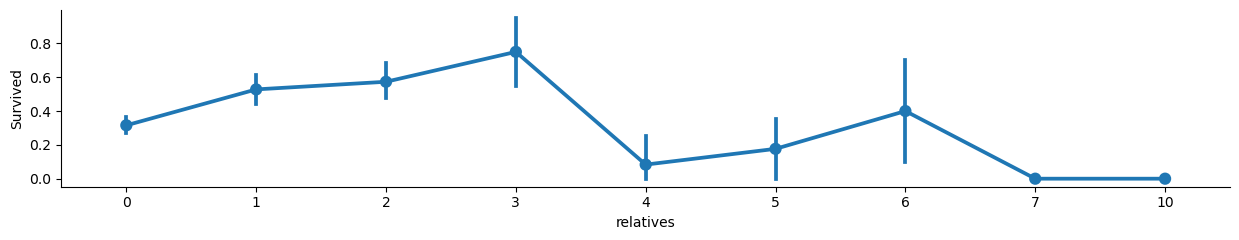

In [57]:
# Specify x and y variables explicitly
axes = sns.catplot(x='relatives', y='Survived', data=train_df, kind='point', height=2.5, aspect=5)


Here we can see that the passenger who had a __1 to 3 relatives had a high probabilty of survival__, but a __lower one if they had less than 1 or more than 3__ (except for some cases with 6 relatives).

* ### __Data Preprocessing__

First, I will __drop ‘PassengerId’, 'Name', 'Ticket'__ from the train and test set, Due to my instincts, I believe their impact on a passenger's chance of survival will be insignificant

In [58]:
data = [train_df, test_df]
for dataset in data:
    dataset.drop(['PassengerId'], axis=1, inplace = True)
    dataset.drop(['Name'], axis=1, inplace = True)
    dataset.drop(['Ticket'], axis=1, inplace = True)
    


In [59]:
train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,relatives
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1


  * #### __Missing Data__

__Cabin:__

Let's keep in mind that we need to handle Cabin (687), Embarked (2), and Age (177). Initially, I considered excluding the 'Cabin' variable, but I found something interesting. The cabin numbers follow the format 'C123,' where the __letter denotes the deck. Each deck is vertically aligned throughout the structure of the ship__ So, the plan is to extract this information to __create a new feature reflecting each person's deck (A, B, C, D, E, F, G).__ Then, I Will convert this feature into a numeric variable, treating any missing values as zeros. Take a look at the image below, showing the different decks on the Titanic from A to G

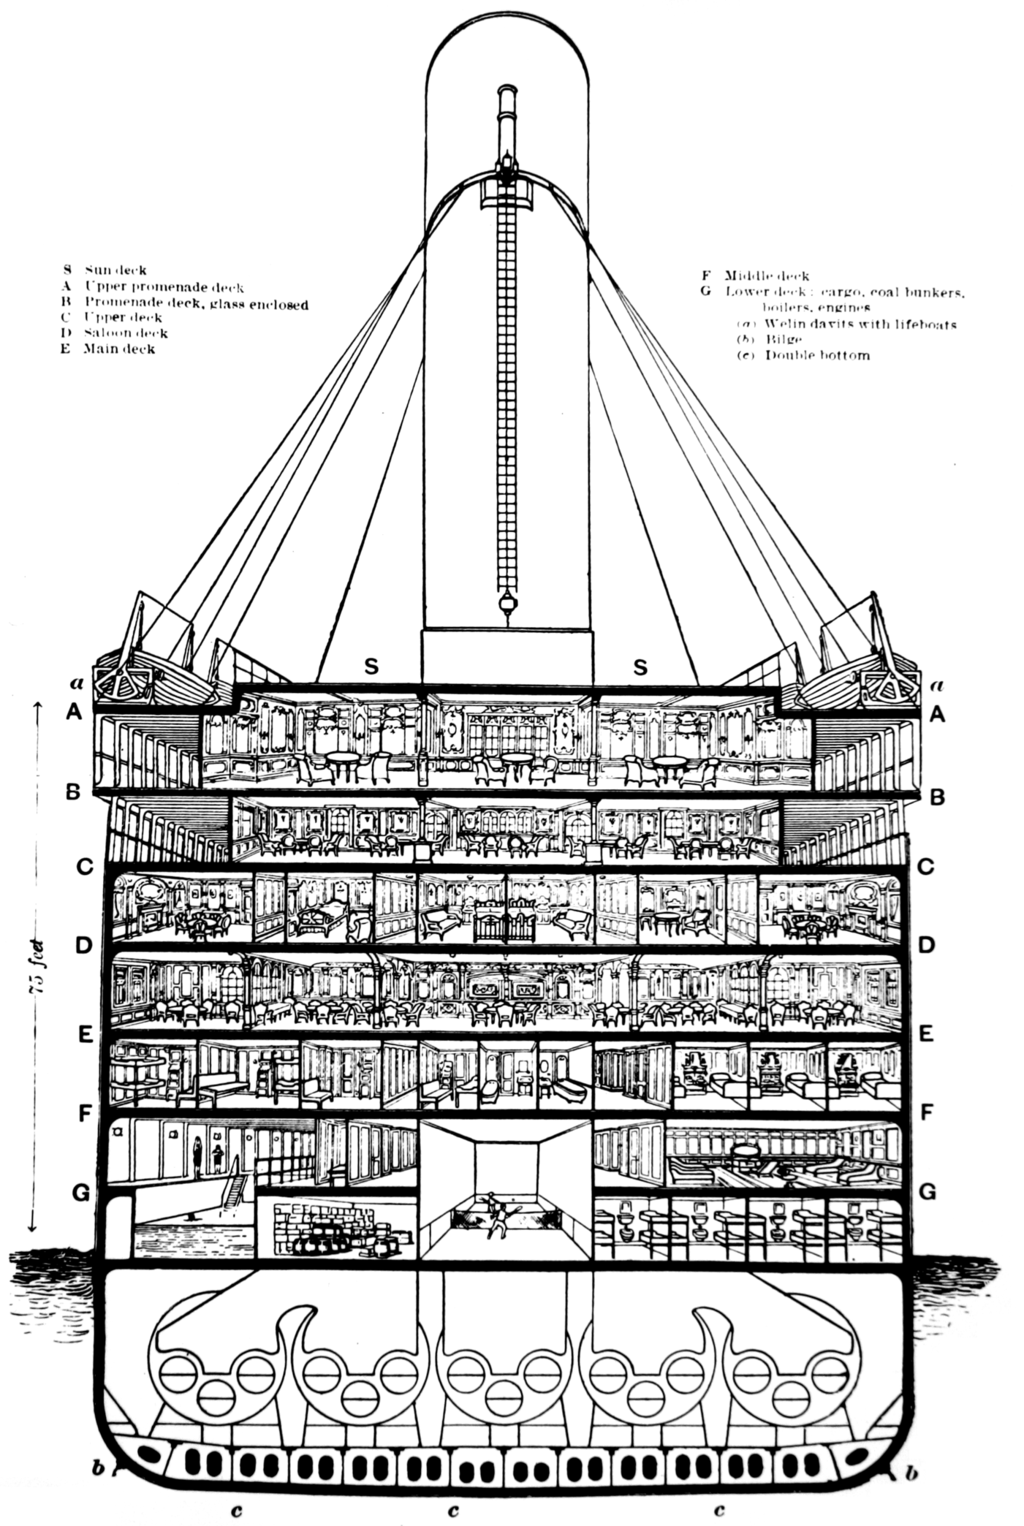

In [60]:

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data = [train_df, test_df]

for dataset in data:
    # Fill NaN values in the 'Cabin' column with "Unknown"
    dataset['Cabin'] = dataset['Cabin'].fillna("Unknown")  # Replace the missing 'Cabin' values with a string to maintain consistency with other string-type values

    # Extract the deck information from the 'Cabin' column using regular expressions
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

    # Map the deck letters to numerical values using a predefined dictionary 'deck'
    dataset['Deck'] = dataset['Deck'].map(deck)

    # Fill NaN values in the 'Deck' column with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)

    # Convert the 'Deck' column to integer type
    dataset['Deck'] = dataset['Deck'].astype(int)

    # Drop the original 'Cabin' column from both the train nd test csv
    dataset.drop(['Cabin'], axis=1, inplace=True)


In [61]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Deck
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,3
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,3
4,0,3,male,35.0,8.0500,S,0,0


__Age:__

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [62]:
# List of datasets
data = [train_df, test_df]

for dataset in data:
    # Calculate statistical measures for 'Age'
    mean_age = dataset['Age'].mean()  # mean
    std_age = dataset['Age'].std()  # std dev
    missing_age_count = dataset['Age'].isnull().sum()  # total count of NaN values in Age column
    
    # Generate random ages within a range based on mean and std
    random_age = np.random.randint(mean_age - std_age, mean_age + std_age, missing_age_count)  
    # an array of length equal to missing values will be generated with
    # lower bound is : u - std dev 
    # upper bound is :  u + std dev, 
    # between these two numbers, random numbers representing age will
    # be generated in an array, and then these values will replace empty values
    
    # Replace missing ages with generated random ages
    age_copy = dataset['Age'].copy()
    age_copy[np.isnan(age_copy)] = random_age  # all the randomly generated ages will sequentially replace all the Nan values
    dataset['Age'] = age_copy.astype(int)

# Check for remaining missing 'Age' values in 'train_df'
train_df['Age'].isnull().sum()


0

__Embarked:__

Since the Embarked feature has only 1 missing value, we will just fill these with the most common one.

In [63]:
train_df['Embarked'].isnull().sum()

1

In [64]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
train_df['Embarked'].isnull().sum()

0

* #### __Converting Features Datatypes:__

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   670 non-null    int64  
 1   Pclass     670 non-null    int64  
 2   Sex        670 non-null    object 
 3   Age        670 non-null    int32  
 4   Fare       670 non-null    float64
 5   Embarked   670 non-null    object 
 6   relatives  670 non-null    int64  
 7   Deck       670 non-null    int32  
dtypes: float64(1), int32(2), int64(3), object(2)
memory usage: 36.8+ KB


Above you can see that __‘Fare’ is a float__ and we have to deal with 2 categorical features: __Sex and Embarked__. Lets investigate and transfrom one after another.

__Fare:__

Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [66]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

__Sex:__

Convert ‘Sex’ feature into numeric.

In [67]:
genders = {'male': 0, 'female': 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

__Embarked:__

Convert ‘Embarked’ feature into numeric.

In [68]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

+ ### __Creating Categories:__

We will now create categories within the following features:

__Age:__

**Now we need to convert the ‘age’ feature by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want majority your data falls into group 1.**

In [69]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6
    
# let's see how it's distributed 
train_df['Age'].value_counts()

Age
6    130
5    119
4    118
2     99
3     94
1     61
0     49
Name: count, dtype: int64

__Fare:__

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category, the fare binning was done manually to get the best distrubution

In [70]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    
    dataset['Fare'] = dataset['Fare'].astype(int)
    
# let's see how it's distributed
train_df['Fare'].value_counts()

Fare
2    179
0    178
1    157
3    116
4     34
5      6
Name: count, dtype: int64

In [71]:
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Deck
0,1,2,1,5,3,0,2,0
1,0,1,0,4,3,0,1,2
2,0,2,0,6,1,0,0,0
3,1,2,0,4,1,0,0,0
4,0,2,0,1,0,0,0,0


### train_df.head()

# __Part 2 - Building and Training the Classification model__

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [72]:
X_train = train_df.drop(['Survived'], axis= 1)  # input to train the model
Y_train = train_df['Survived']  # output of the train input for model validation
y_test = test_df['Survived']
X_test = test_df.drop(['Survived'], axis = 1)

### 1. __Random Forest:__

In [73]:
random_forest = RandomForestClassifier(n_estimators=100, random_state = 42)
random_forest.fit(X_train, Y_train)

Y_prediction_rf = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)

In [74]:
# Get the default parameters of the RandomForestClassifier
default_params = random_forest.get_params()

 ### 2. __Logistic Regression:__

In [75]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

Y_pred_lr = logreg.predict(X_test)

acc_logreg = round(logreg.score(X_train, Y_train) * 100, 3)

### 3. __K Nearest Neighbor:__

In [76]:
# KNN
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 3)

## __Which is the best Model ?__

In [77]:
results = pd.DataFrame({'Model': ['KNN', 'Logestic Regresion', 'Random Forest'],\
                       'Score': [acc_knn, acc_logreg, acc_random_forest]})
result_df = results.sort_values(by= 'Score', ascending= False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
91.642,Random Forest
84.925,KNN
79.851,Logestic Regresion


As we can see, the __Random Forest classifier goes on the first place__. But first, let us check, how random-forest performs, when we use __cross validation__.

## __K-Fold Cross Validation:__

K-Fold Cross Validation randomly splits the training data into __K subsets called folds__.
The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [78]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators= 100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73134328 0.7761194  0.7761194  0.76119403 0.82089552 0.92537313
 0.82089552 0.8358209  0.82089552 0.79104478]
Mean: 0.8059701492537314
Standard Deviation: 0.05039385974965413


This looks much more realistic than before. Our model has a __average accuracy of 80% with a standard deviation of 5 %__. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of __our model can differ + - 5%__.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further by __hyper parameter__ tuning in the following section.

### __Random Forest__

To say it in simple words: __Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction__.

__One big advantage of random forest is, that it can be used for both classification and regression problems__, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

__The random-forest algorithm brings extra randomness into the model, when it is growing the trees__. Instead of __searching for the best feature while splitting a node, it searches for the best feature among a random subset of features__. This process creates a __wide diversity__, which __generally results in a better model__. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

### __Feature Importance__

__Another great quality of random forest is that they make it very easy to measure the relative importance of each feature__. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, __reduce impurity on average (across all trees in the forest)__. It computes this score automaticall for each feature after training and scales the results so that the __sum of all importances is equal to 1__. We will acces this below:

In [79]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending= False).set_index('feature')

importances.head(15)

,importance
feature,
Sex,0.331
Age,0.192
relatives,0.118
Fare,0.113
Pclass,0.099
Deck,0.084
Embarked,0.062


<Axes: xlabel='feature'>

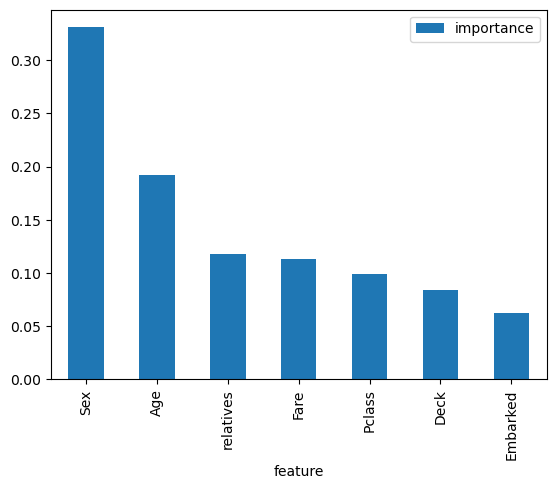

In [80]:
importances.plot.bar()

__Now we can start tuning the hyperameters of random forest.__

### __Hyperparameter Tuning__

Below I have performed __hyperparamter tuning__ for the parameters __criterion, min_samples_leaf, min_samples_split__ and __n_estimators__, __max_depth__, __max_features__.

I will first use random search to narrow down the list of hyperparameters and then use grid search to pinpoint the parameter values, the code is obviously commented as it takes a long time to run , can also crash the notebook or browser.The output is pasted below, (the code was run on google colab as jupyter notebook kept crashing for me)

## __RandomizedSearch cv 

In [81]:
#  parameter distribution for randomizedsearch cv


# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15,20,25],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

# # Initialize the model
# rf = RandomForestClassifier()


# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, n_jobs=-1)
# random_search.fit(X_train, Y_train)

# Getting the best parameters..
# best_params = random_search.best_params_

# print(best_params)



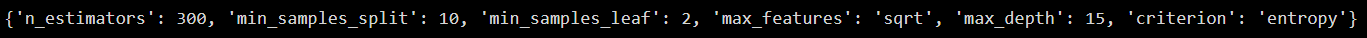

### __GridSearch Cv results below:__

In [82]:
# make a grid parameters surrounding the values given by random search

# param_grid = {
#     'n_estimators': [250, 275, 300, 325, 375],  #300 in [100,200,300,400,500]
#     'min_samples_split': [6,9,10,12,14],  #10 in [2, 5, 10, 15,20,25]
#     'min_samples_leaf': [2, 3],  #2 [1, 2, 4],
#     'max_features': ['sqrt'],
#     'max_depth': [11, 13, 15, 17, 19], # 15 [None, 5, 10, 15, 20]
#     'criterion': ['entropy']
# }


# rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=1, n_jobs=-1)

# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, verbose=10)

# clf.fit(X_train, Y_train)

# clf.best_params_

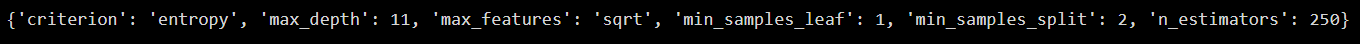

__Test new Parameters:__

In [83]:
rf_tuned = RandomForestClassifier(criterion= 'entropy', 
                                  max_depth=11, 
                                  max_features= 'sqrt', 
                                  min_samples_leaf= 1,min_samples_split= 2, 
                                  n_estimators=250,
                                  random_state=42)


# random_forest.fit(X_train, Y_train)
rf_tuned.fit(X_train, Y_train)

# Y_prediction_rf = random_forest.predict(X_test)
Y_pred_rf_2 = rf_tuned.predict(X_test)

# random_forest.score(X_train, Y_train)
rf_tuned.score(X_train, Y_train)

0.9164179104477612

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it’s more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

## __Further Evaluation__

### __Confusion Matrix:__

In [84]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = cross_val_predict(random_forest, X_train, Y_train, cv= 3)
confusion_matrix(Y_train, predictions)

array([[351,  58],
       [ 84, 177]], dtype=int64)

### __Precision, Recall and F-Score:__

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))
print("F1-Score:", f1_score(Y_train, predictions))

Precision: 0.7531914893617021
Recall: 0.6781609195402298
F1-Score: 0.7137096774193549


Our model predicts __82%__ of the time, a passengers survival correctly (__precision__). The __recall__ tells us that it predicted the survival of __74 %__ of the people who actually survived.

You can __combine precision and recall into one score__, which is called the __F-score__. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

There we have it, a __77 % F-score__. __The score is not that high__, because we have a __recall of 74%__. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

### __Precision Recall Curve__

Lets plot the precision and recall with the threshold using matplotlib:

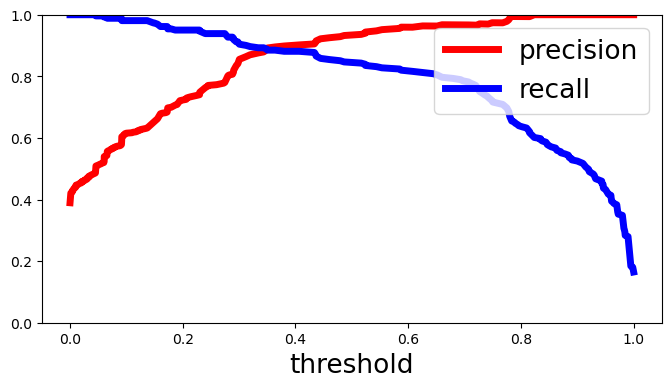

In [97]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above its clearly seen that the __recall is falling of rapidly at a precision__ of around __70%__. Because of that we might want to select the precision/recall tradeoff before that — maybe at around __65 %__.

we are now able to choose a threshold, that gives us the best precision/recall tradeoff for our current machine learning problem. example For a precision of __80%__, wecan easily look at the plots and see that you would need a threshold of around 0.4. Then we could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other:

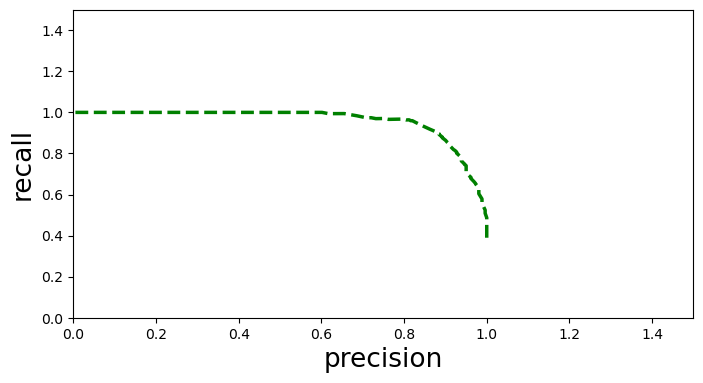

In [99]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(8, 4))
plot_precision_vs_recall(precision, recall)
plt.show()

### __ROC AUC Curve__

Another way to evaluate and compare our binary classifier is provided by the __ROC AUC Curve__. This curve plots the __true positive rate (TPR) (also called Sensitivity or recall)__ against the __false positive rate (ratio of incorrectly classified negative instances)__, instead of plotting the precision versus the recall.

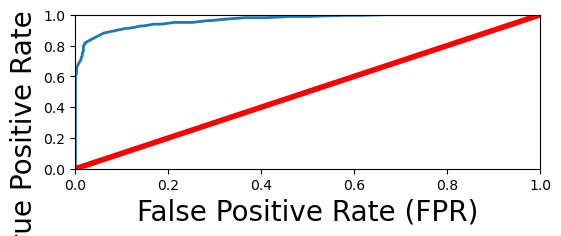

In [100]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=20)
    plt.ylabel('True Positive Rate (TPR)', fontsize=20)

plt.figure(figsize=(6, 2))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### __ROC AUC Score__

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [89]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9672268592680026


# __In conclusion__

__There are many things for a greater chance to survive. Being a female or an infant will increase the chances. If you have a higher class ticket you have the more chance of surviving than a third class ticket. As for a man, you are more likely to survive if embark in Cherbourg compare to Southampton or Queenstown. If you also travel with 1 or 3 people than 0 or more than 3 your survival chances are greater. The younger you are will also make your survival chance. So it comes down to many things to surivive on the titanic.__